# Temporalis demonstration notebook

This notebook demonstrates the use of the [Brightway2 temporalis](http://brightway2-temporalis.readthedocs.org/en/latest/index.html) software. You should probably also know about the [Brightway2 LCA framework](http://brightwaylca.org/).

In [1]:
import bw2temporalis
print("Temporialis version:", bw2temporalis.__version__)
assert bw2temporalis.__version__ >= (0, 9), "Temporalis needs to be upgraded!"

Temporialis version: (0, 9, 1)


In [2]:
from brightway2 import *
from bw2temporalis import *

In [3]:
projects.current = "temporalis demo test ecoinvent linking"

In [4]:
if "biosphere3" not in databases:
    create_default_biosphere3()

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 0.373 sec


Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applied 2 strategies in 0.01 seconds
Title: Writing activities to SQLite3 database:
  Started: 11/09/2015 09:50:53
  Finished: 11/09/2015 09:50:53
  Total time elapsed: 0.373 sec
  CPU %: 97.700000
  Memory %: 0.378191
Created database: biosphere3


In [5]:
ei = SingleOutputEcospold2Importer(
    "/Users/cmutel/Documents/LCA Documents/Ecoinvent/3.1/cutoff/datasets",
    "ecoinvent 3.1 cutoff"
)
ei.apply_strategies()
ei.write_database()

Extracting ecospold2 files:
0%                          100%
[##############################] | ETA[sec]: 0.000 | Item ID: fff527b1-0fe4-4
Total time elapsed: 67.010 sec


Title: Extracting ecospold2 files:
  Started: 11/09/2015 09:51:41
  Finished: 11/09/2015 09:52:48
  Total time elapsed: 67.010 sec
  CPU %: 87.000000
  Memory %: 3.196692
Extracted 11301 datasets in 67.20 seconds
Applying strategy: normalize_units
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applied 12 strategies in 2.73 seconds

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 37.928 sec



Title: Writing activities to SQLite3 database:
  Started: 11/09/2015 09:52:51
  Finished: 11/09/2015 09:53:29
  Total time elapsed: 37.928 sec
  CPU %: 86.700000
  Memory %: 3.462446
Created database: ecoinvent 3.1 cutoff


Brightway2 SQLiteBackend: ecoinvent 3.1 cutoff

In [4]:
ei = None
db = Database("ecoinvent 3.1 cutoff")
len(db)

11301

In [8]:
databases['ecoinvent 3.1 cutoff']['static'] = True
databases.flush()

## Creating a temporal inventory database

In [9]:
METHANE = ('biosphere3', '0795345f-c7ae-410c-ad25-1845784c75f5')  # Methane, fossil, air, kg
CO2 = ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e')      # CO2, fossil, air, kg

In [10]:
data = {
    ('example', 'Functional Unit'): {
        'exchanges': [
            {
                'amount': 5,
                'input': ('example', 'EOL'),
                'temporal distribution': [
                    (0, 1),
                    (1, 1),
                    (2, 1),
                    (3, 1),
                    (4, 1)
                ],
                'type': 'technosphere'
            },
        ],
        'name': 'Functional Unit',
        'type': 'process'
    },
    ('example', 'EOL'): {
        'exchanges': [
            {
                'amount': 0.8,
                'input': ('example', 'Waste'),
                'type': 'technosphere'
            },
            {
                'amount': 0.2,
                'input': ('example', 'Landfill'),
                'type': 'technosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Use'),
                'type': 'technosphere'
            },
        ],
        'name': 'EOL',
        'type': 'process'
    },
    ('example', 'Use'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Production'),
                'temporal distribution': [(-0.5, 1)],
                'type': 'technosphere'
            },
        ],
        'name': 'Use',
        'type': 'process'
    },
    ('example', 'Production'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Transport'),
                'temporal distribution': [(-0.1, 1)],
                'type': 'technosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('example', 'Transport'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Sawmill'),
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': CO2,
                'type': 'biosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('example', 'Sawmill'): {
        'exchanges': [
            {
                'amount': 1.2,
                'input': ('example', 'Forest'),
                'temporal distribution': [(-0.5, 1.2)],
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': CO2,
                'type': 'biosphere'
            },
        ],
        'name': 'Sawmill',
        'type': 'process'
    },
    ('example', 'Forest'): {
        'exchanges': [
            {
                'amount': -.2 * 6,
                'input': CO2,
                'temporal distribution': [(x, -.2) for x in (0, 5, 10, 15, 20, 30)],
                'type': 'biosphere'
            },
            {
                'amount': 1.5,
                'input': ('example', 'Thinning'),
                'temporal distribution': [
                    (5, .5),
                    (10, .5),
                    (15, .5),
                ],
                'type': 'technosphere'
            },
            {
                'amount': 1.5,
                'input': db.random(),
                'temporal distribution': [
                    (5, .5),
                    (10, .5),
                    (15, .5),
                ],
                'type': 'technosphere'
            },
        ],
        'name': 'Forest',
        'type': 'process'
    },
    ('example', 'Thinning'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Thinning'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Thinning',
        'type': 'process'
    },
    ('example', 'Landfill'): {
        'exchanges': [
            {
                'amount': 0.1,
                'input': METHANE,
                'temporal distribution': [
                    (20, 0.025),
                    (30, 0.025),
                    (40, 0.025),
                    (50, 0.025)
                ],
                'type': 'biosphere'
            },
        ],
        'name': 'Landfill',
        'type': 'process'
    },
    ('example', 'Waste'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Waste'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Waste',
        'type': 'process'
    },
    ('example', 'Avoided impact - waste'): {
        'exchanges': [
            {
                'amount': -0.6,
                'input': CO2,
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - waste',
        'type': 'process'
    },
    ('example', 'Avoided impact - thinnings'): {
        'exchanges': [
            {
                'amount': -0.2,
                'input': CO2,
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - thinnings',
        'type': 'process'
    }
}

db = Database("example")
db.write(data)

Writing activities to SQLite3 database:
0%        100%
[############] | ETA[sec]: 0.000 
Total time elapsed: 0.004 sec


Title: Writing activities to SQLite3 database:
  Started: 11/09/2015 09:59:01
  Finished: 11/09/2015 09:59:01
  Total time elapsed: 0.004 sec
  CPU %: 115.900000
  Memory %: 0.365901


## Create static LCIA method

Note the units will be different from the dynamic method; this is watts/m2.

Values from 2013 assessment report.

In [11]:
if ('IPCC 2013 100',) not in methods:
    standard_ipcc = Method(('IPCC 2013 100',))
    standard_ipcc.register()
    standard_ipcc.write([
        [CO2, 1],
        [METHANE, 34]
    ])

## Create dynamic methods

Adapted from [co-fire library](https://github.com/gschivley/co-fire).

Units are degree Kelvin.

In [12]:
from bw2temporalis.cofire import create_temperature_method

if "GTP" not in dynamic_methods:
    create_temperature_method()

## Check static LCA scores

In [13]:
lca = LCA({('example', 'EOL'): 1}, ('IPCC 2013 100',))
lca.lci()
lca.lcia()
lca.score

2.6548530268901342

In [14]:
from bw2analyzer import ContributionAnalysis

ContributionAnalysis().annotated_top_processes(lca)

[(-1.4400001144409202, 1.2000000476837158, 'Forest'),
 (0.68000002026557937, 0.20000000298023224, 'Landfill'),
 (0.48000002622604399, -0.80000001192092896, 'Avoided impact - waste'),
 (0.36000001966953299, -1.8000000715255737, 'Avoided impact - thinnings'),
 (0.22752175250108309,
  0.15203591726107524,
  'aluminium production, primary, liquid, prebake'),
 (0.22539062254790079,
  0.53393345070014231,
  'treatment of recovered paper to linerboard, testliner'),
 (0.22308123140358974, 0.26273286914447513, 'pig iron production'),
 (0.14939944804340005,
  0.35591984096027912,
  'treatment of recovered paper to fluting medium, wellenstoff'),
 (0.10000000149011612, 1.0, 'Production'),
 (0.10000000149011612, 1.0, 'Sawmill'),
 (0.098270546938995215,
  0.82769617407402507,
  'transport, freight, lorry 16-32 metric ton, EURO3'),
 (0.081829424968830181, 0.097498746252431878, 'clinker production'),
 (0.080427337361914791,
  0.26819840072041451,
  'natural gas production, unprocessed, at extraction')

In [15]:
ContributionAnalysis().annotated_top_emissions(lca)

[(1.8185420057057067, 1.8185420057057069, 'Carbon dioxide, fossil'),
 (0.83631102118442779, 0.024597382976012584, 'Methane, fossil'),
 (0.0, 3.2854764333954605e-17, 'Mefenpyr-diethyl'),
 (0.0, 0.00048051297918028953, 'Sulfate'),
 (0.0, 0.0019529885330217081, 'Dissolved solids'),
 (0.0, 1.3284254790559865e-07, 'Tin, ion'),
 (0.0, 0.0041994922602254584, 'Calcium, ion'),
 (0.0, 3.7911511377531511e-06, 'Boron'),
 (0.0, 4.7487725940955603e-08, 'Ethylene diamine'),
 (0.0, 3.5235065122803771e-07, 'Arsenic, ion'),
 (0.0, 2.7943566526577297e-06, 'Copper'),
 (0.0,
  1.9353563446614165e-07,
  'Tantalum, 81.9% in tantalite, 1.6E-4% in crude ore, in ground'),
 (0.0, 0.00023175490196034542, 'Sulfur oxides'),
 (0.0, 0.00029571097499244884, 'Hydrocarbons, aromatic'),
 (0.0, 1.1729489505609282e-06, 'Silicon'),
 (0.0, 1.1534457673605333e-07, 'Lead'),
 (0.0, 0.00062200996219085951, 'Dissolved solids'),
 (0.0, 0.0, 'Oryzalin'),
 (0.0, 0.036938088335420394, 'Occupation, traffic area, road network'),
 (0.0,

## Dynamic LCA

In [16]:
%matplotlib inline

In [17]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
dlca = DynamicLCA({('example', 'EOL'): 1}, ("GTP", "worst case"))
timeline = dlca.calculate()

In [6]:
dlca.timeline = Timeline()
dlca.gt = GraphTraversal()
dlca.heap = []
dlca.calc_number = 0

In [7]:
dlca.gt_results = dlca.gt.calculate(
    dlca.demand,
    dlca.worst_case_method,
    **dlca.gt_kwargs
)

In [ ]:
dlca.

In [9]:
characterized = timeline.characterize_dynamic("GTP")

In [10]:
%matplotlib inline

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

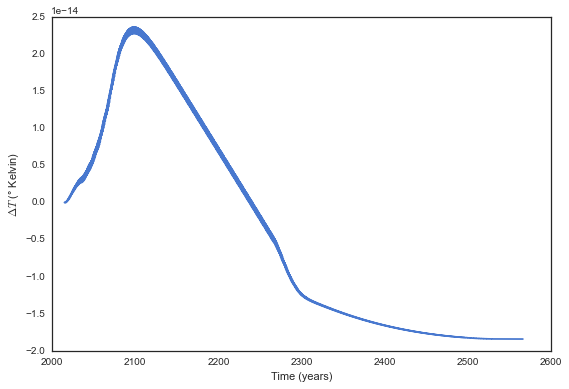

In [12]:
plt.plot(*characterized)
plt.xlabel("Time (years)")
plt.ylabel(r"$\Delta T$ (° Kelvin)")
plt.tight_layout()